In [27]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Convolution1D, Convolution2D
from keras.regularizers import l2, activity_l2

from random import randint
from keras.layers import Merge, LSTM, Dense
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
import sklearn
from sklearn import preprocessing

testData = np.genfromtxt('testData.txt', dtype = None)


In [70]:
print testData[0]

( 38.669998,  38.669998, '2016-12-30',  39.,  38.43,  38.720001, 'YHOO', 6431600)


In [19]:
# Part 1  
# One single featuere
X0 = [] # Adj_Close
X1 = [] #
X2 = [] #
X3 = [] #
X4 = [] # High
X5 = [] #




In [54]:
for tuple in testData:
    X4.append(tuple[4])
    X4n2= preprocessing.normalize(X4) #,norm='l2')

/Users/Gene/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:
for tuple in testData:
    X4.append(tuple[4])

In [56]:
print max(X4)
print min(X4)
print X4[0:5]
print ""
print len(X4)
print X4[0].size

51.639999
26.15
[38.43, 38.479999999999997, 38.709999000000003, 38.5, 38.369999]

756
1


In [67]:
X4n2= preprocessing.normalize(X4) #,norm='l2')


#X4n2=np.reshape(756,1)
# print max(X4n2)
# print min(X4n2)
# print len(X4n2)
# print len(X4n2[0])
# #print X4n2[0]

# print ""

X4n2=X4n2[0]
print len(X4n2)
#print X4n2


756


/Users/Gene/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:

size = 1000
window = 25
X = np.empty([0, window])
Y = np.zeros(size)
batchSize = 10

for i in range(size):
    start = randint(0, len(testData)-window-1)
    X = np.concatenate((X, np.asarray(X4[start : start + window]).reshape(1, window)), axis = 0)
    Y[i] = X4[start + window]
print(X.shape)
print(Y.shape)
    
model = Sequential()
model.add(Dense(1, input_dim = window))
model.compile(optimizer='rmsprop',loss='mse') # for a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.33, batch_size=batchSize, nb_epoch=20, initial_epoch=0)
print(history)

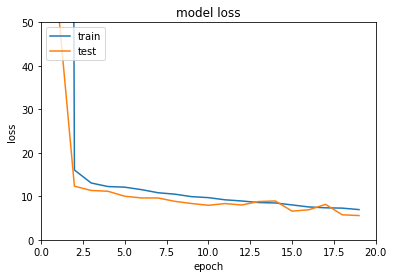

In [12]:
plt.axis((0, 20, 0, 50))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)
print("\nMSE: {}".format(training_loss))

 870/1000 [=========================>....] - ETA: 0s
MSE: 6.20400877476


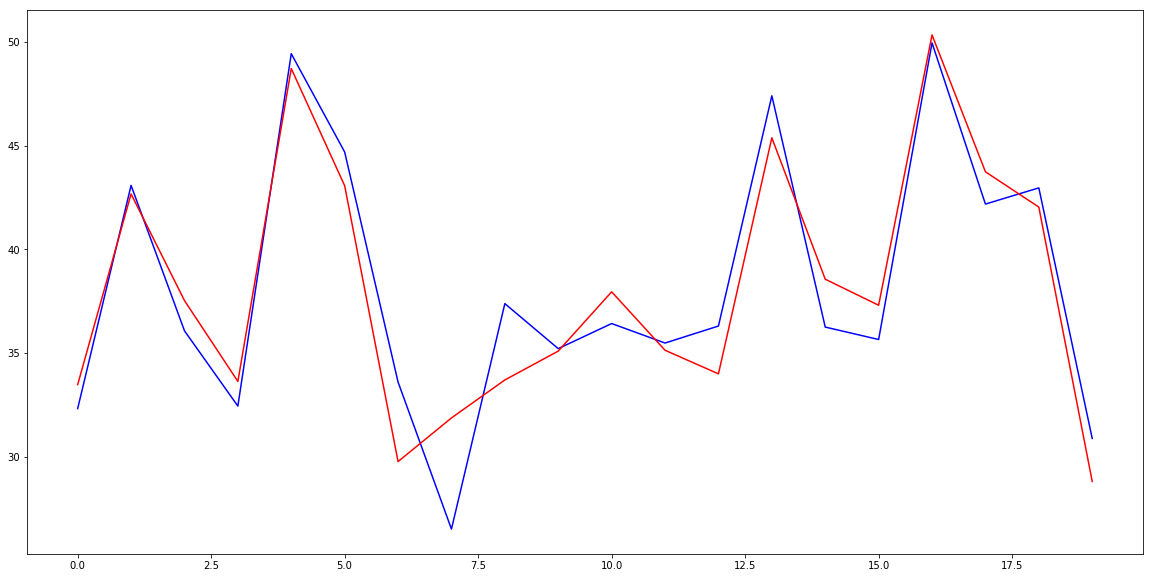

 920/1000 [==========================>...] - ETA: 0s

In [14]:
scope = 20  # should be smaller than len(Y)
YHat = model.predict(X, batch_size=batchSize, verbose=0)
YHat = np.ravel(YHat)
x = np.arange(0, scope)
plt.figure(figsize=(20,10))
plt.plot(x, Y[0:scope], 'b', x, YHat[0:scope], 'r')
plt.show()
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)

In [15]:
# Part 2
# Multiple featueres
# X0 = [] # Adj_Close
# X1 = [] #
# X2 = [] #
# X3 = [] #
# X4 = [] # High
# X5 = [] #

# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']

# make feature 2 - dates to be number comvertable
for tuple in testData:
    tuple[2] = tuple[2].replace("-", "")
    
# convert feature 6 - stock name to be stock-id (Yahoo == 1)
for tuple in testData:
    tuple[6] = 1

# 7 features so far
data = [[], [], [], [], [], [], []]  
for tuple in testData:
    for i in range(len(data)):
            data[i].append(float(tuple[i]))
            
# Remove redunt features
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
data = [data[0], data[1], data[3], data[4], data[5]]
            
# convert data into numpy 2d array
data = np.asarray(data)   

print(data.shape)

# print(X)


(5, 756)


In [16]:
size = 1000
window = 25

# Three dim
# dim1: each datum
# dim2: TimeStep: a sequence of consecutive values 
# dim3: Feature Dimention: There are 7 features
X = np.empty([0, window, len(data)])  
Y = np.zeros(size)
batchSize = 20

print(data.shape)
print(X.shape)
print(data[:, 0:0 + window].shape)
for i in range(size):
    start = randint(0, len(testData)-window-1)
    oneSlice = data[:, start:start + window].T
    # to concatenate, we need to reshape one slice to 3d
    X = np.concatenate((X, np.asarray(oneSlice).reshape(1, window, len(data))), axis = 0) 
    Y[i] = data[2][start + window]    # Need to figure out which is high 
# print(X)
# X = X.reshape(len(X), len(data)*window)
print(X.shape)

(5, 756)
(0, 25, 5)
(5, 25)
(1000, 25, 5)


In [17]:
# BestParameter so far, mse = 7.5
# model.add(LSTM(80, input_shape=(window, len(data))))
# model.add(Dense(70))
# model.add(Dense(50))
# model.add(Dense(30))
# model.add(Dense(10))
# model.add(Dense(1))

# mse = 6.9
# model.add(Convolution1D(len(data), window*0.5, border_mode='same', input_shape=(window, len(data))))
# model.add(LSTM(int(p*0.8), input_shape=(window, len(data))))
# model.add(Dense(p*0.6))
# model.add(Dense(p*0.3))
# model.add(Dense(p*0.1))
# model.add(Dense(3))
# model.add(Dense(1))

In [18]:
model = Sequential()
p = window*len(data)
print(p)
# model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
model.add(Convolution1D(len(data), window*0.2, border_mode='same', input_shape=(window, len(data))))
model.add(LSTM(int(p*0.4), input_shape=(window, len(data))))
model.add(Dense(p*0.3))
model.add(Dense(p*0.1))
model.add(Dense(3))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse') # a mean squared error regression problem
history = model.fit(X, Y, validation_split=0, batch_size=batchSize, nb_epoch=20, initial_epoch=0)
print(history)

125
Epoch 1/20
1000/1000 [==============================] - 7s - loss: 635.1347       